# **Multivariate Linear Regression**
Linear regression involving multiple variables is called “multiple linear regression” or multivariate linear regression. 

Simple linear regression have one dependent and one independent variable, but in multiple linear regression the dependent variable is one but there may be two or more independent variables.

The steps to perform multiple linear regression are almost similar to that of simple linear regression. The difference lies in the evaluation. You can use it to find out which factor has the highest impact on the predicted output and how different variables relate to each other.

<img src = 'a_img.png'>

In multple linear regression each coefficient is interpreted as the estimate change in Y corresponds to one unit change in a variable, when other variables held constant.

Linear regression is used to predict prices, weather, stock prices, quality of items, sales, etc. It is a model useful for finding the correlation between the two factors, independent variables(used to make predictions) and the dependent variable(the values to be predicted).

<img src = 'b_img.png' width="1500" height="1500">



In [41]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sb 

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [42]:
dataset = pd.read_csv('Admission_Predict.csv')
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


## **Drop 'Serial No.' Feature**

In [43]:
dataset = dataset.drop(['Serial No.'], axis=1)

## **Checking Missing Values**

In [44]:
dataset.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

1.    GRE (Graduate Record Examination) Scores (out of 340)
2.    TOEFL Scores (out of 120)
3.    University Rating (out of 5)
4.    Statement of Purpose and Letter of Recommendation Strength (out of 5)
5.    Undergraduate GPA (out of 10)
6.    Research Experience (either 0 or 1)
7.    Chance of Admit (ranging from 0 to 1)

**How to find the best coefficients to determine Y?**

Two things we need to consider when we choose the coefficients, they are

1.    The independent variable must have a strong correlation with the dependent variable.
2.    The independent variable should not have a good correlation with any other independent variable.

## **Checking Shape of Dataset**

In [45]:
dataset.shape

(400, 8)

## **Descriptive Analysis**

In [46]:
dataset.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## **Correlation Analysis**

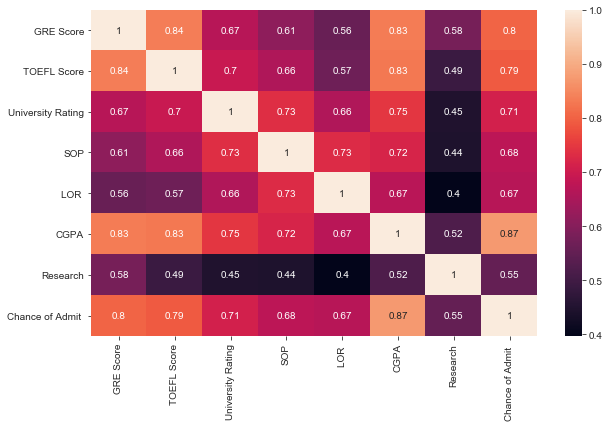

In [27]:
corr_data = dataset.corr()

plt.figure(figsize=(10, 6))
sb.set_style('ticks')

sb.heatmap(corr_data, annot=True)
plt.show()

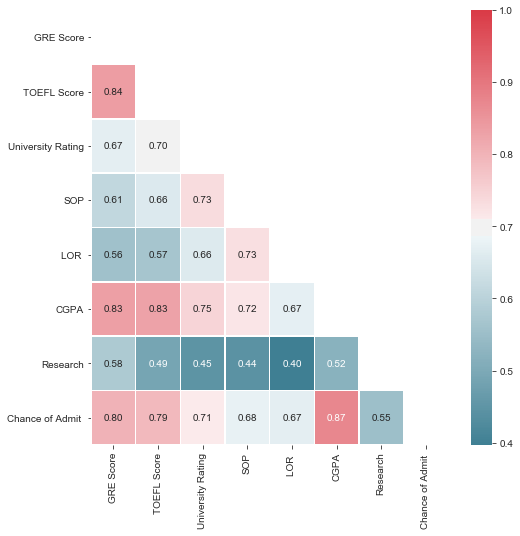

In [28]:
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sb.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sb.diverging_palette(220, 10, as_cmap=True)
sb.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

## **Splitting X and Y**

In [47]:
X = dataset[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].values
y = dataset['Chance of Admit '].values

## **Visualize 'Chance of Admit' (Target Feature)**

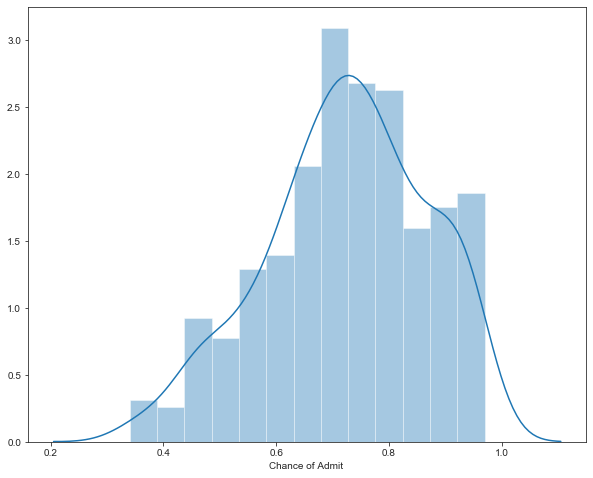

In [40]:
plt.figure(figsize=(10,8))
plt.tight_layout()
sb.distplot(dataset['Chance of Admit '])

## **Spliting Data Train & Data Test**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## **Training Model**

In [32]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## **Slope & Intercept**

In [33]:
regressor.coef_

array([ 0.00207128,  0.00195523,  0.00657193, -0.00472847,  0.02118445,
        0.12463177,  0.02414366])

In [49]:
X_columns = dataset[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].columns

coeff_df = pd.DataFrame(regressor.coef_, X_columns, columns=['Coefficient/Slope'])  
coeff_df

,Coefficient/Slope
GRE Score,0.002071
TOEFL Score,0.001955
University Rating,0.006572
SOP,-0.004728
LOR,0.021184
CGPA,0.124632
Research,0.024144


In [48]:
regressor.intercept_

-1.304713830082414

## **Comparing y Prediction and y Actual**

In [35]:
y_pred = regressor.predict(X_test)

In [36]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

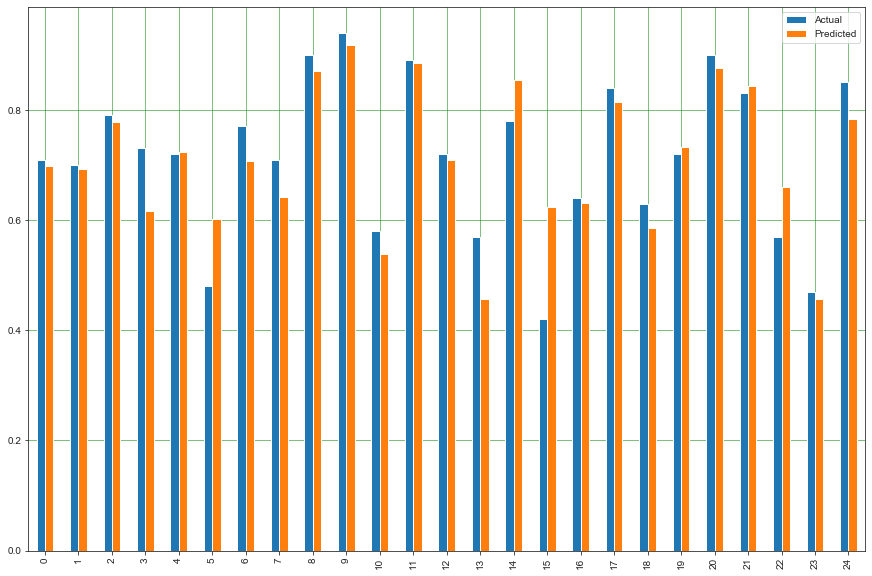

In [50]:
df1.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## **Evaluating Model using MAE, MSE, & RMSE**

In [51]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", round(metrics.r2_score(y_test, y_pred), 2))

Mean Absolute Error: 0.05008754843817949
Mean Squared Error: 0.004805156569785205
Root Mean Squared Error: 0.06931923665033542
R2 Score: 0.74


In [52]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
MAE = metrics.mean_absolute_error(y_test, y_pred)
mean_target = dataset['Chance of Admit '].mean()

print('Percentage of Error by RMSE', round(RMSE / mean_target * 100, 2), 'persen')
print('Percentage of Error by MAE', round(MAE / mean_target * 100, 2), 'persen')

Percentage of Error by RMSE 9.57 persen
Percentage of Error by MAE 6.91 persen


**Root Mean Square Error** is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are. The lower the RMSE value, the model would be fit well.

**Coefficient Of Determination (R²)** It helps to understand which amount of variation in y can be explained by the dependence on x using the particular regression model. The R² value close to 1, the better the fit. It means, the model can better predict the output(y) for the input(x).

In [53]:
#MAE
(2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2)/10

2.0

In [54]:
#MAE
(2 + 3 + 4 + 5 + 6 + 7 + 8 + 9 + 10 + 11)/10

6.5

In [55]:
# RMSE
import numpy as np
np.sqrt(((2**2) + (2**2) + (2**2) + (2**2) + (2**2) + (2**2) + (2**2) + (2**2) + (2**2) + (2**2))/10)

2.0

In [56]:
# RMSE
import numpy as np
np.sqrt(((2**2) + (3**2) + (4**2) + (5**2) + (6**2) + (7**2) + (8**2) + (9**2) + (10**2) + (11**2))/10)

7.106335201775948

# TAKE HOME EXERCISE
1. Dataset yang digunakan adalah Admission_Predict.csv. X = 'GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', Y = Chance of Admit

2. Buat beberapa percobaan untuk menemukan model MLR terbaik

3. Urutan percobaan 1 (train 80% test 20%):

    1.a) Variabel independent tidak ada intervensi sama sekali
    
    1.b) Handling outlier
    
    1.c) Scalling
    
4. Urutan percobaan 2 (train 90% test 10%):

    2.a) Variabel independent tidak ada intervensi sama sekali
    
    2.b) Handle outlier
    
    2.c) Scalling  
    
5. Di setiap percobaan tampilkan MAE, MSE, dan RMSE + Perkembangan secara persentase

## **Reference**
* Nagesh Singh Chauhan, "A beginner’s guide to Linear Regression in Python with Scikit-Learn", https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
* Dataset source: https://www.kaggle.com/mohansacharya/graduate-admissions/data
* Manja Bogicevic, "Multiple Linear Regression Using Python", https://medium.com/@manjabogicevic/multiple-linear-regression-using-python-b99754591ac0
* Arnav Oberoi, "Multiple Linear Regression-Beginner’s Guide", https://towardsdatascience.com/multiple-linear-regression-beginners-guide-5b602d716aa3
* Abin Joy, "Multiple Linear Regression with Python", https://medium.com/analytics-vidhya/multiple-linear-regression-with-python-98f4a7f1c26c